# Building and image classifier with keras

In [1]:
# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

from tensorflow import keras
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

keras.__version__

'2.8.0'

## 1. THE DATASET: FASHION MNIST

In [2]:
# read fashionmnis dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print(X_train_full.shape)

(60000, 28, 28)


In [4]:
print(X_test.shape)

(10000, 28, 28)


Each pixel intensity is represented as a byte (0 to 255):

In [5]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [12]:
# Here are the corresponding class names:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# The first image in the training set is a coat:
print(class_names[y_train[0]])

Coat


You can plot an image using Matplotlib's imshow() function, with a 'binary' color map:

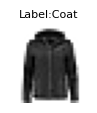

In [15]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.title('Label:'+class_names[y_train[0]], fontsize=8)
plt.show()

In [8]:
# The labels are the class IDs (represented as uint8), from 0 to 9:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

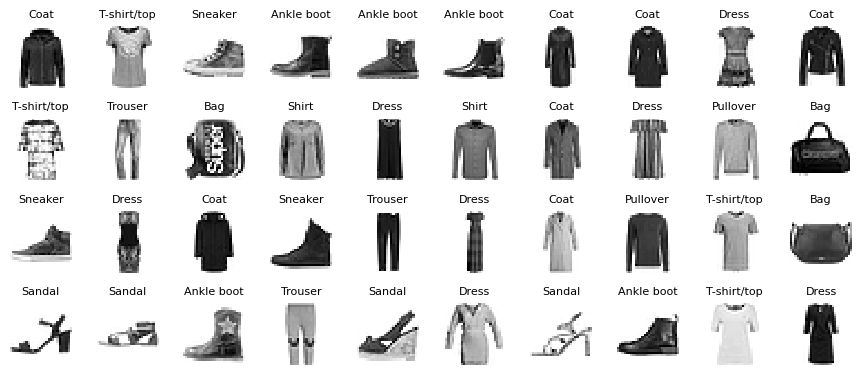

In [17]:
# Let's take a look at a sample of the images in the dataset:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.1, n_rows * 1.1))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=8)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 2.0 THE MLP MODEL

In [11]:
# clear previous session
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
# Let's create a classification model for this problem
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# Option 2
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.layers

### How many parameters does the model have? think about it?

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


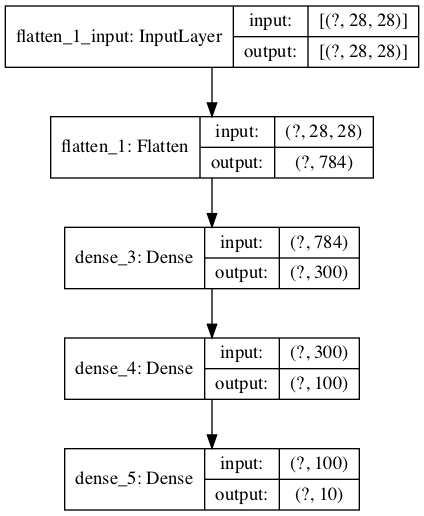

In [15]:
#we can plot the model using the following funcition
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

#if it does not work, perhaps some packages need to be installed:
#!conda install -y graphviz
#!conda install -y pydot

In [16]:
# lets define our loss function, optimizer and accuracy metrics
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

this is equivalent to
```python

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

```

There are several variants of gradient descent, which differ in how we compute the step.

Keras supports seven optimizers.

```python
my_opt = K.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
my_opt = K.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
my_opt = K.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
my_opt = K.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
my_opt = K.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
my_opt = K.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
my_opt = K.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
```

In [17]:
# let's train the classifier for 5 epochs
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 5s 91us/sample - loss: 0.7010 - accuracy: 0.7697 - val_loss: 0.5241 - val_accuracy: 0.8164
Epoch 2/5
55000/55000 [==============================] - 4s 78us/sample - loss: 0.4850 - accuracy: 0.8313 - val_loss: 0.4543 - val_accuracy: 0.8420
Epoch 3/5
55000/55000 [==============================] - 4s 78us/sample - loss: 0.4407 - accuracy: 0.8458 - val_loss: 0.4149 - val_accuracy: 0.8592
Epoch 4/5
55000/55000 [==============================] - 4s 78us/sample - loss: 0.4157 - accuracy: 0.8557 - val_loss: 0.3915 - val_accuracy: 0.8650
Epoch 5/5
55000/55000 [==============================] - 4s 79us/sample - loss: 0.3959 - accuracy: 0.8621 - val_loss: 0.3980 - val_accuracy: 0.8644


In [18]:
history.params

{'batch_size': 32,
 'epochs': 5,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

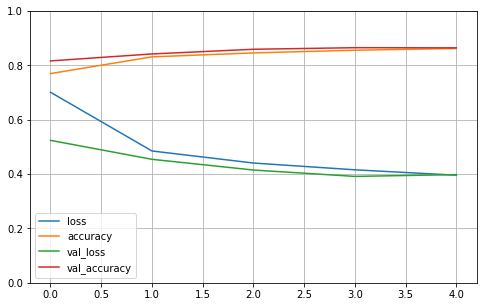

In [19]:
# it is important to plot the training curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

[0.   0.   0.   0.   0.   0.08 0.   0.13 0.01 0.79]


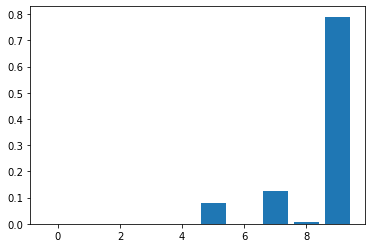

In [20]:
# we can evaluate on sample
X_new = X_test[:1]
y_proba = model.predict(X_new)[0]
print(y_proba.round(2))
plt.bar(range(y_proba.shape[0]),y_proba)
plt.show()

In [21]:
# if we want to test several examples

X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))

y_pred = model.predict_classes(X_new)
print("\nclass predixtions", y_pred)

[[0.   0.   0.   0.   0.   0.08 0.   0.13 0.01 0.79]
 [0.   0.   0.91 0.   0.01 0.   0.08 0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]

class predixtions [9 2 1]


Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 5s 89us/sample - loss: 0.7312 - accuracy: 0.7577 - val_loss: 0.5321 - val_accuracy: 0.8196
Epoch 2/15
55000/55000 [==============================] - 4s 79us/sample - loss: 0.4906 - accuracy: 0.8289 - val_loss: 0.4611 - val_accuracy: 0.8416
Epoch 3/15
55000/55000 [==============================] - 5s 82us/sample - loss: 0.4428 - accuracy: 0.8438 - val_loss: 0.4239 - val_accuracy: 0.8564
Epoch 4/15
55000/55000 [==============================] - 4s 78us/sample - loss: 0.4173 - accuracy: 0.8529 - val_loss: 0.3950 - val_accuracy: 0.8628
Epoch 5/15
55000/55000 [==============================] - 4s 78us/sample - loss: 0.3969 - accuracy: 0.8594 - val_loss: 0.4083 - val_accuracy: 0.8562
Epoch 6/15
55000/55000 [==============================] - 4s 80us/sample - loss: 0.3804 - accuracy: 0.8650 - val_loss: 0.3709 - val_accuracy: 0.8732
Epoch 7/15
55000/55000 [==============================] -

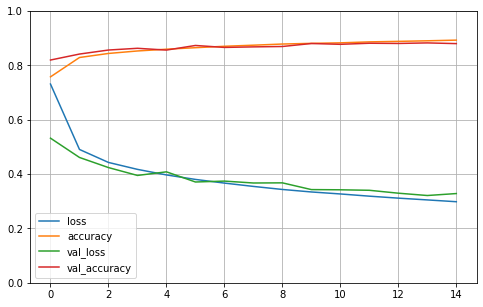

10000/1 - 0s - loss: 0.2778 - accuracy: 0.8721


[0.35862880314588547, 0.8721]

In [22]:
# Let's put everything in one cell:

# create the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# define loss function, optimizer and metrics
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# train the model and validate using val data
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid))

# plot training curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# evaluate the model using test data
model.evaluate(X_test, y_test,verbose=2)

## Saving and Restoring

Training a Neural Network can take a lot of time. Saving and restoring the model could be really important

In [23]:
# we create and train a model

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# define loss function, optimizer and metrics
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# train the model and validate using val data
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

acc_test = model.evaluate(X_test, y_test,verbose=2)

model.save("my_keras_model.h5")

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 5s 90us/sample - loss: 0.7118 - accuracy: 0.7650 - val_loss: 0.5276 - val_accuracy: 0.8168
Epoch 2/5
55000/55000 [==============================] - 4s 82us/sample - loss: 0.4895 - accuracy: 0.8290 - val_loss: 0.4587 - val_accuracy: 0.8444
Epoch 3/5
55000/55000 [==============================] - 4s 81us/sample - loss: 0.4429 - accuracy: 0.8447 - val_loss: 0.4231 - val_accuracy: 0.8554
Epoch 4/5
55000/55000 [==============================] - 4s 81us/sample - loss: 0.4168 - accuracy: 0.8538 - val_loss: 0.3931 - val_accuracy: 0.8654
Epoch 5/5
55000/55000 [==============================] - 4s 81us/sample - loss: 0.3967 - accuracy: 0.8613 - val_loss: 0.3996 - val_accuracy: 0.8612
10000/1 - 0s - loss: 0.3684 - accuracy: 0.8403


In [24]:
print('\nTrained model:')
print(model.predict(X_new))
print(acc_test)

print('\nUntrained model:')
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


print(model.predict(X_new))

model = keras.models.load_model("my_keras_model.h5")
print('\nloading model...')
print(model.predict(X_new))
acc_test = model.evaluate(X_test, y_test,verbose=2)
print(acc_test)


Trained model:
[[1.20383418e-04 2.55083069e-05 7.90485210e-05 1.25798993e-04
  2.69677694e-05 6.27495795e-02 2.49201519e-04 1.20246254e-01
  4.30573430e-03 8.12071562e-01]
 [2.76250212e-04 4.84819930e-06 9.43202257e-01 1.49565385e-05
  7.71512184e-03 1.56467950e-10 4.87510003e-02 2.68881611e-10
  3.56573473e-05 1.86718925e-08]
 [5.18074048e-05 9.99790967e-01 1.08179011e-05 5.32257400e-05
  9.04584012e-05 7.12926873e-09 7.64720994e-07 1.69613202e-06
  1.82768176e-07 7.94589354e-08]]
[0.44002338676452635, 0.8403]

Untrained model:
[[0.05858086 0.04558652 0.08579235 0.06853268 0.1553805  0.07937056
  0.28203046 0.05832026 0.0754509  0.09095493]
 [0.03299933 0.02983969 0.06385162 0.08473442 0.16358234 0.09603881
  0.340341   0.02589836 0.05214599 0.11056841]
 [0.04944379 0.0719016  0.0895929  0.11706821 0.13168448 0.07818167
  0.22980566 0.04642532 0.04980976 0.13608658]]

loading model...
[[1.20383418e-04 2.55083069e-05 7.90485210e-05 1.25798993e-04
  2.69677694e-05 6.27495795e-02 2.4920

## Using Callbacks during Training

https://keras.io/api/callbacks/early_stopping/

In [25]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 5s 89us/sample - loss: 0.7228 - accuracy: 0.7623 - val_loss: 0.5304 - val_accuracy: 0.8160
Epoch 2/5
55000/55000 [==============================] - 4s 81us/sample - loss: 0.4838 - accuracy: 0.8323 - val_loss: 0.4494 - val_accuracy: 0.8454
Epoch 3/5
55000/55000 [==============================] - 5s 83us/sample - loss: 0.4379 - accuracy: 0.8471 - val_loss: 0.4175 - val_accuracy: 0.8552
Epoch 4/5
55000/55000 [==============================] - 5s 82us/sample - loss: 0.4127 - accuracy: 0.8555 - val_loss: 0.3898 - val_accuracy: 0.8652
Epoch 5/5
55000/55000 [==============================] - 5s 83us/sample - loss: 0.3929 - accuracy: 0.8627 - val_loss: 0.3983 - val_accuracy: 0.8620


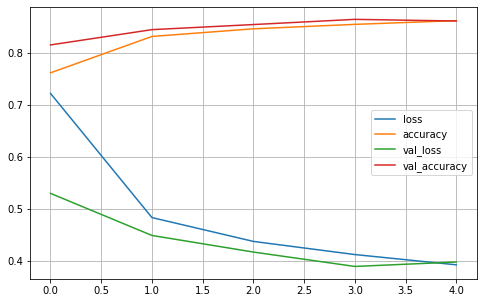

10000/1 - 0s - loss: 0.3406 - accuracy: 0.8403


In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# define loss function, optimizer and metrics
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# define a call back
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True , patient = 10)

# train the model and validate using val data
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

# plot training curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

acc_test = model.evaluate(X_test, y_test,verbose=2)

In [27]:
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
acc_test = model.evaluate(X_test, y_test, verbose = 2)

10000/1 - 1s - loss: 0.3523 - accuracy: 0.8491


In [28]:
acc_val = model.evaluate(X_valid, y_valid, verbose = 2)

5000/1 - 0s - loss: 0.2544 - accuracy: 0.8652


## Early stopping

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)
# train the model and validate using val data
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])

mse_test = model.evaluate(X_test, y_test, verbose = 2)

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 5s 94us/sample - loss: 0.3933 - accuracy: 0.8608 - val_loss: 0.3946 - val_accuracy: 0.8630
Epoch 2/50
55000/55000 [==============================] - 4s 81us/sample - loss: 0.3771 - accuracy: 0.8661 - val_loss: 0.3744 - val_accuracy: 0.8702
Epoch 3/50
55000/55000 [==============================] - 4s 81us/sample - loss: 0.3629 - accuracy: 0.8704 - val_loss: 0.3618 - val_accuracy: 0.8734
Epoch 4/50
55000/55000 [==============================] - 4s 82us/sample - loss: 0.3523 - accuracy: 0.8752 - val_loss: 0.3522 - val_accuracy: 0.8764
Epoch 5/50
55000/55000 [==============================] - 4s 81us/sample - loss: 0.3421 - accuracy: 0.8792 - val_loss: 0.3545 - val_accuracy: 0.8756
Epoch 6/50
55000/55000 [==============================] - 4s 82us/sample - loss: 0.3329 - accuracy: 0.8810 - val_loss: 0.3417 - val_accuracy: 0.8810
Epoch 7/50
55000/55000 [==============================] -

## Custom callbacks

In [ ]:
from tensorflow.keras.callbacks import Callback
from IPython.display import clear_output

class PlotLearning(Callback):
    """
    Callback para plotear las métricas durante el entrenamiento.
    """
    def __init__(self, showLR=False, epoch_show=10):
      self.showLR = showLR                   # podemos elegir si mostrar o no el plot del learning rate en cada epoch
      self.epoch_show = epoch_show           # cada cuantas epochs muestra el plot

    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            
    def on_epoch_end(self, epoch, logs={}):
        if epoch%self.epoch_show==0:
            for metric in logs:
                if metric in self.metrics:
                    self.metrics[metric].append(logs.get(metric))
                else:
                    self.metrics[metric] = [logs.get(metric)]
            
            metric = [x for x in logs if ('val' not in x) and ('lr' not in x)]
            if self.showLR:
              metric.append('lr')
            
            f, axs = plt.subplots(1,len(metric),figsize=(10,4))
            x = [a for a in range(0,epoch+1) if a%self.epoch_show==0]
            clear_output(wait=True)            
            for i,ax in enumerate(axs):
              ax.plot(x, self.metrics[metric[i]],'o--',label=metric[i])
              try:
                ax.plot(x, self.metrics['val_' + metric[i]], 'o--', label='val_' + metric[i])
              except:
                pass
              ax.set_xlabel('# epochs')
              ax.set_ylabel(metric[i])
              ax.legend()
              ax.grid()
    
            plt.tight_layout()
            plt.show()

plotter_cb = PlotLearning(showLR = False, epoch_show = 5)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)
# train the model and validate using val data
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb, plotter_cb])

mse_test = model.evaluate(X_test, y_test, verbose = 0)

## Avoid overfitting through regularization

### $L_1$ and $L_2$ regularization

Just as we saw in linear models, we can use $l_1$ and $l_2$ regularization to constrain our model parameters.

```python
layer = keras.layers.Dense(100, activation="relu",
                           kernel_regularizer=keras.regularizers.l2(0.01))

layer = keras.layers.Dense(100, activation="relu",
                           kernel_regularizer=keras.regularizers.l1(0.01))
```

### Dropout

Dropout is one of the most popular regularization techniques for deep neural networks. The key idea is really simple: **randomly drop units** (along with their connections) from the neural network during training. In these way, we avoit to have specialized units for a task, as they will be randomly died.
```python
keras.layers.Dropout(0.5)
````


## Batch Normalization

The vanishing/Exploding gradients problem is one of the main issues we can find when training a neural network. As we already know, the algorithm computes the gradients of the cost function with regards to each parameter, and it uses these gradients in order to update each parameter with a Gradient Descent step.

Unfortunatly, on deep networks it is commonn that gradients gets smaller and smaller as as the algorithm progress in the lower levels. To overcome this problem several strategies can be used as for instance: 1) use not saturated activated fuctions; 2) "smart" parameter initialization; 3) Batch Normalization. 

**Batch normalization** is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.